# A-SOUL直播观众数据分析
## 1. 介绍
本Jupyter Notebok旨在对提取出来的用户弹幕数据进行统计分析，并制作数据可视化。
## 2. 数据导入与预处理
### 2.1 原始数据导入

In [21]:
import json
import os
with open("./output.txt") as f:
    data = json.load(f)

### 2.2 数据预处理
将json格式的数据转换为pandas dataframe，并输出为csv文件。

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.DataFrame(data).transpose()
df['uid'] = df.index
df = df[['uid', 'first_seen', 'last_seen', 'stream_count', 'comment_count']]
df['first_seen'] = pd.to_datetime(df['first_seen'], format="%Y.%m.%d")
df['last_seen'] = pd.to_datetime(df['last_seen'], format="%Y.%m.%d")

## 3. 数据分析与可视化
A-SOUL观众的划分依据是什么？有人会说是看过直播就是A-SOUL观众，有人会说看很多场直播、发很多弹幕乃至打了米才算A-SOUL观众。而本次分析中使用的依据是：看过10场以上A-SOUL直播。该标准来自A-SOUL在2023年7月BW线下活动活动时提出的一个问题“看过10场A-SOUL直播的观众请举手”。
基于这一标准，保留下来的“A-SOUL观众”的标准是：stream_count >= 10。由于stream_count仅在某uid在某场直播有过至少1条被记录下的弹幕时才会为这一uid加1，因此这一标准会筛选掉以下类型的A-SOUL粉丝：
- 不看A-SOUL直播的粉丝
- 看A-SOUL直播却不发弹幕的粉丝
- 看A-SOUL直播少于10场的粉丝
- 看A-SOUL直播场数多于10场，但被记录到有弹幕的场次少于10场

对于最后一种粉丝，应当注意到：看A-SOUL直播足够多（远大于10场）的粉丝即使有少数直播内发的弹幕没有被记录到，累积的stream_count也会超过10。所以可以认为这一标准作为筛选标准的偏差是可以被接受的。

In [24]:
audience = df[df['stream_count']>=10]
audience

,uid,first_seen,last_seen,stream_count,comment_count
347819072,347819072,2023-06-07,2023-07-06,21,1214
26676219,26676219,2023-06-07,2023-06-28,10,31
26284012,26284012,2023-06-07,2023-07-06,21,9575
515106418,515106418,2023-06-07,2023-07-06,18,1326
51784147,51784147,2023-06-07,2023-07-05,14,3078
...,...,...,...,...,...
28460416,28460416,2023-06-11,2023-06-30,10,18
1572620492,1572620492,2023-06-11,2023-06-30,10,73
47425803,47425803,2023-06-14,2023-06-30,12,54
24840588,24840588,2023-06-14,2023-06-30,10,16


在去除掉看A-SOUL直播少于10场的UID后，还剩余120350个UID。以下数据分析过程中如无特殊声明，"A-SOUL观众"等类似词汇默认指代这一部分B站用户。
#### 3.1 A-SOUL观众整体分析
##### 3.1.1 A-SOUL观众 入坑时间分析
入坑时间在这里指的是发出第一条弹幕的时间，即first_seen一列。对这一列进行可视化与统计分析：

In [25]:
first_seen_months = []
for first_seen_month in audience['first_seen']:
    first_seen_months.append(first_seen_month.strftime('%Y-%m'))

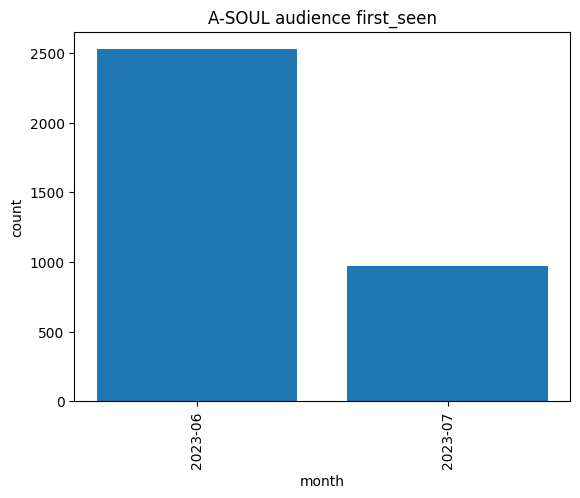

In [26]:
from collections import Counter

def create_bar_plot(data_list, title, xlabel, ylabel):
    # Count the occurrences of each value in the list
    occurrences = dict(Counter(data_list))
    # Sort keys
    dicKeys = list(occurrences.keys())
    dicKeys.sort()
    sorted_occurrences = {i: occurrences[i] for i in dicKeys}

    # Get the unique values and their corresponding occurrences
    unique_values = list(sorted_occurrences.keys())
    occurrences_count = list(sorted_occurrences.values())
    
    # Create a bar plot
    plt.bar(unique_values, occurrences_count)

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation = 90)
    # Show the plot
    plt.show()
create_bar_plot(first_seen_months, "A-SOUL audience first_seen","month", "count")

In [27]:
audience[audience['first_seen']>= pd.Timestamp(2023, 7, 1, 0)]

,uid,first_seen,last_seen,stream_count,comment_count
209438780,209438780,2023-07-02,2023-07-06,12,29
417354,417354,2023-07-02,2023-07-06,12,495
37189997,37189997,2023-07-02,2023-07-06,11,88
16440429,16440429,2023-07-02,2023-07-06,15,128
3697058,3697058,2023-07-02,2023-07-06,17,195
...,...,...,...,...,...
19502677,19502677,2023-07-06,2023-07-06,10,11
160362320,160362320,2023-07-06,2023-07-06,10,13
6840143,6840143,2023-07-06,2023-07-06,10,72
11875466,11875466,2023-07-06,2023-07-06,13,61


In [28]:
data['161711896']

{'first_seen': '2023.07.06',
 'last_seen': '2023.07.06',
 'stream_count': 4,
 'comment_count': 4}

**数据有问题 需要大修**
#### 3.1.1. A-SOUL观众入坑时间分析

#### 3.1.2. A-SOUL观众退坑时间分析

#### 3.1.3. A-SOUL观众弹幕量分析

#### 3.1.4. A-SOUL观众观看直播次数分析

### 3.2 510事件后退坑观众分析

## 4. 结论